In [1]:
import PIL.Image as Image
import matplotlib.pyplot as plt
from PIL import ImageOps
from nose.tools import assert_equal, assert_almost_equal
import numpy as np
import cv2
import glob

def loadImage(iPath): 
    oImage = Image.open(iPath)
    oImage = np.array(oImage)
    
    #raise NotImplementedError()
    return oImage
def showImage(iImage, iTitle):
    plt.figure(iTitle)
    plt.imshow(iImage,cmap='gray',clim=[0,255])
    #plt.xlabel('x axis')
    #plt.ylabel('y axis')

def saveImage(iPath, iImage, iFormat):
 
    img = im.fromarray(iImage)
    img.save(iPath, iFormat)
    
def canny(iImage,thr_type):
    # YOUR CODE HERE
    if thr_type == 1:
        
        m = np.median(iImage)
        tl = int(max(0,1.0-1/3)*m)
        th = int(min(255,1.0+1/3)*m)
        oEdge = cv2.Canny( iImage, tl, th )
        return tl,th,oEdge
       
    if thr_type == 2:
        
        ret,thr = cv2.threshold(iImage, 0, 255, cv2.THRESH_OTSU)
        to = ret
        tl = np.floor(to/2)
        th = to
        oEdge = cv2.Canny( iImage, tl, th )
        return tl,th,oEdge
        
        
    #raise NotImplementedError()
    return tl,th,oEdge
    


<IPython.core.display.Javascript object>


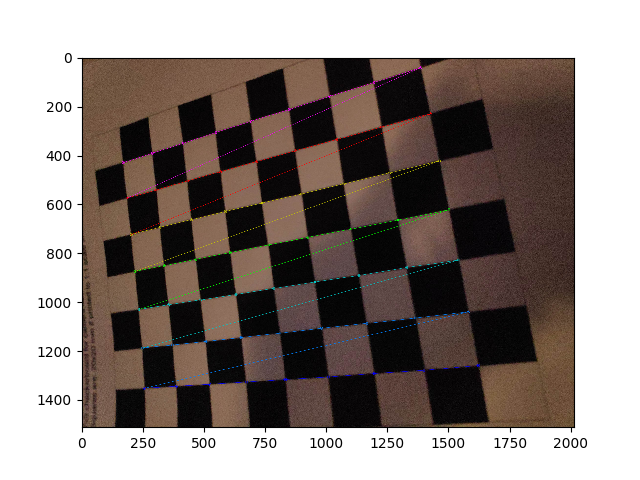

<IPython.core.display.Javascript object>


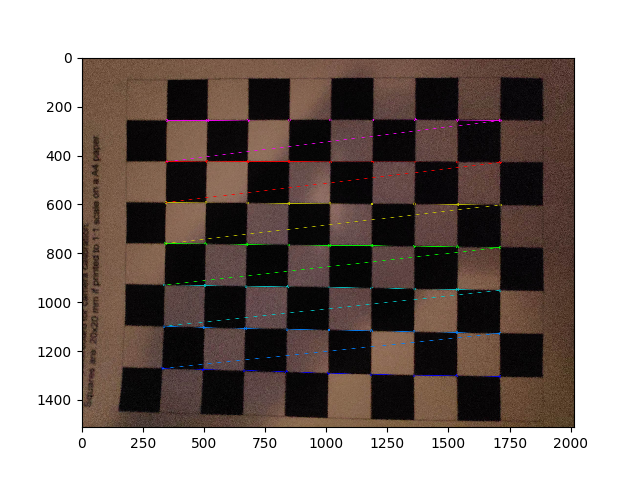

<IPython.core.display.Javascript object>


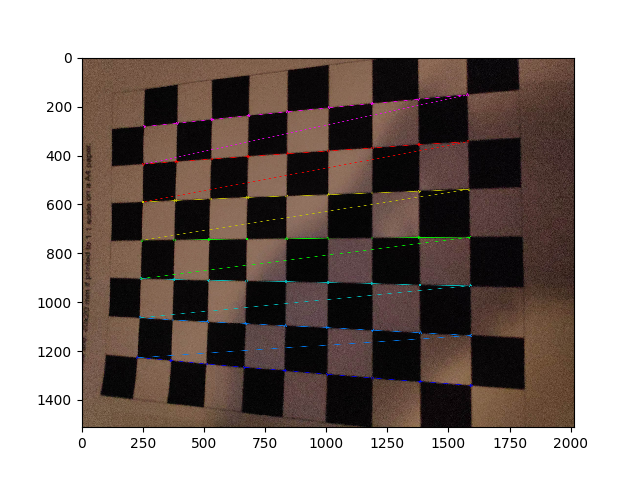

Camera matrix : 

[[1.39323063e+03 0.00000000e+00 1.01125424e+03]
 [0.00000000e+00 1.39624347e+03 7.61347434e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[ 1.57808539e-01 -7.67585057e-01  2.12984961e-03 -8.62962174e-04
   1.02287074e+00]]
rvecs : 

[array([[0.45705665],
       [0.1106177 ],
       [2.93801856]]), array([[-0.05969128],
       [-0.02247691],
       [-3.13002662]]), array([[0.36794714],
       [0.06622879],
       [3.11921122]])]
tvecs : 

[array([[2.79980206],
       [2.29077644],
       [6.43944073]]), array([[3.97188594],
       [3.08855383],
       [7.99032571]]), array([[2.87277093],
       [2.86757344],
       [6.94527594]])]


In [12]:
#%matplotlib notebook

# zključitveni kriterij
krit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


objp = np.zeros((7*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:7].T.reshape(-1,2)

# arraya za shranjevanje točk iz slike in iz realnega objekta.
tobj = [] # 3d point in real world space
tslik = [] # 2d points in image plane.

slike = glob.glob('./calib3/*.jpg')

for fname in slike:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # poiščemo oglišča
    ret, corners = cv2.findChessboardCorners(gray, (9,7),None)

    # če najdemo oglišča, dodamo točke v array
    if ret == True:
        tobj.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),krit)
        tslik.append(corners2)

        # narišemo in prikažemo oglišča
        img = cv2.drawChessboardCorners(img, (9,7), corners2,ret)
        plt.figure()
        plt.imshow(img)
        #cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(tobj, tslik, gray.shape[::-1],None,None)
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

<IPython.core.display.Javascript object>


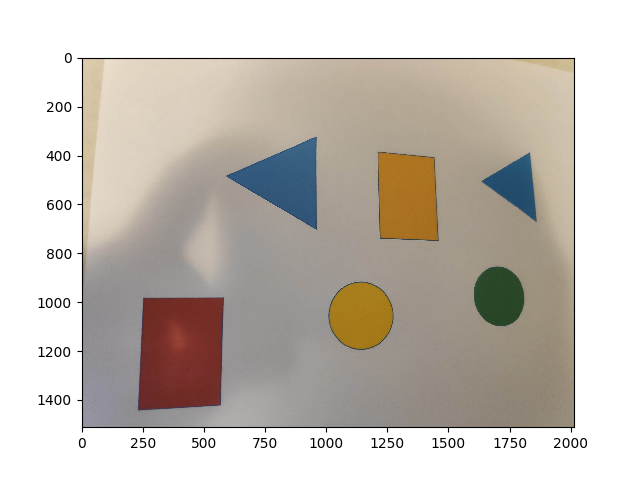

[[1.41553931e+03 0.00000000e+00 1.00921928e+03]
 [0.00000000e+00 1.40323169e+03 7.64119448e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


<IPython.core.display.Javascript object>


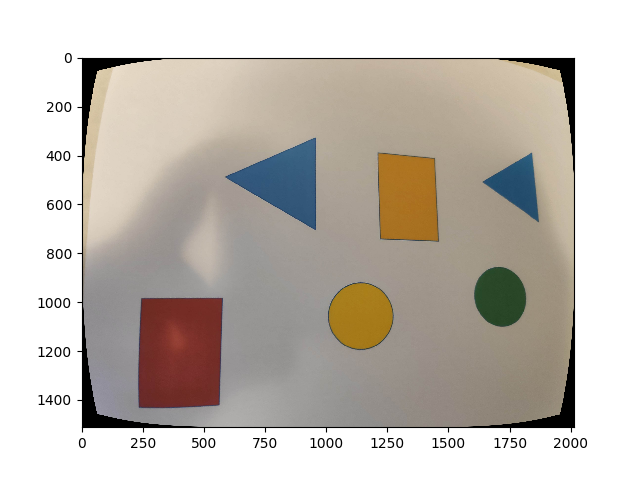

<IPython.core.display.Javascript object>


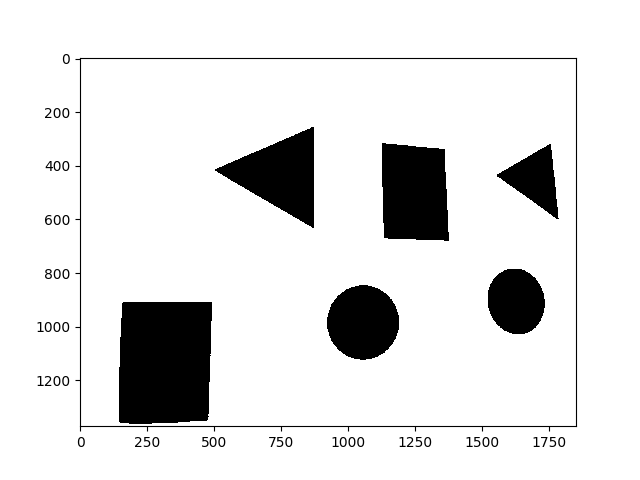

In [18]:
#%matplotlib notebook
#img1 = loadImage('liki3/l4.jpg')
img1 = cv2.imread('liki3/l4.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
h,w = img1.shape[:2]
plt.figure()
plt.imshow(img1)
#optimiziramo matriko parametrov kamere
optmat,roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

print(optmat)

dst = cv2.undistort(img1, mtx, dist, None, optmat)
plt.figure()
plt.imshow(dst)
# obržemo sliko
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]



gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#pragslika = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            #cv2.THRESH_BINARY,21,10)
#upragovanje
_,pragslika = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure()
plt.imshow(pragslika,cmap = 'gray')

Povrsina oblike: 2534979.0
Povrsina oblike: 151692.5
Povrsina oblike: 58736.0
Povrsina oblike: 41517.5
Povrsina oblike: 31382.5
Povrsina oblike: 83549.5
Povrsina oblike: 71469.5

 {'Kvadrat': 0, 'Pravokotnik': 2, 'Petkotnik': 0, 'Trikotnik': 2, 'Krog': 2}


<IPython.core.display.Javascript object>


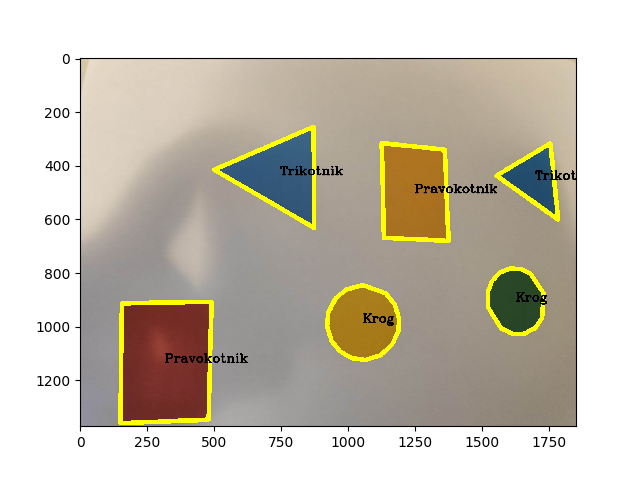

In [4]:
%matplotlib notebook

#iskanje obrisov
contours, _ = cv2.findContours(pragslika, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
oblika={'Kvadrat':0,'Pravokotnik':0,'Petkotnik':0,'Trikotnik':0,'Krog':0}

x_sl = pragslika.shape[0]
y_sl = pragslika.shape[1]

for contour in contours:
    #aproksimira krivuljo z drugo, manj kompleksno
    approxkriv = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    
    #izračun površine oblike
    povrsina_oblike = cv2.contourArea(contour)
    print("Povrsina oblike:",povrsina_oblike)
    
    
    if povrsina_oblike<((x_sl-100)*(y_sl-100)) and povrsina_oblike>500  : # da ne štejemo slike in nepravilnosti
        cv2.drawContours(dst, [approxkriv], 0, (255, 255, 0), 15)
        
        M = cv2.moments(contour)  # računanje središč kontur
        x = int(M["m10"] / M["m00"])
        y = int(M["m01"] / M["m00"])
        
        #3 oglišča 
        if len(approxkriv) == 3:
            cv2.putText(dst, "Trikotnik", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0,0,0), 4, cv2.LINE_AA)
            oblika['Trikotnik']+=1
         #4 oglišča   
        elif len(approxkriv) == 4:
            x1 ,y1, w, h = cv2.boundingRect(approxkriv)
            razmerje = float(w)/h
            #print(aspectRatio)
            #preverjanje ali je kvadrat ali pravokotnik
            if razmerje >= 0.95 and razmerje <= 1.05:
                cv2.putText(dst, "Kvadrat", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0,0,0), 4, cv2.LINE_AA)
                oblika['Kvadrat']+=1
                
            else:
                cv2.putText(dst, "Pravokotnik", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0,0,0), 4, cv2.LINE_AA)
                oblika['Pravokotnik']+=1
         #5 ogljišč       
        elif len(approxkriv) == 5:
            cv2.putText(dst, "Petkotnik", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0,0,0), 4, cv2.LINE_AA)
            oblika['Petkotnik']+=1
        #krog  je zapisan z mnogo oglišči zato je več kot 5 krog  
        elif len(approxkriv) > 5:
            cv2.putText(dst, "Krog", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0,0,0), 4, cv2.LINE_AA)
            oblika['Krog']+=1
   
        

print('\n',oblika)
showImage(dst,'Označeni liki')

<IPython.core.display.Javascript object>


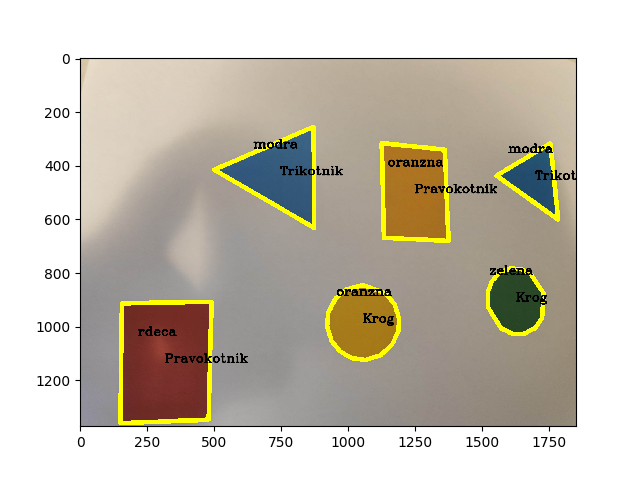

{'rdeca': 1, 'oranzna': 2, 'rumena': 0, 'zelena': 1, 'modra': 2}


In [6]:
img_hsv=cv2.cvtColor(dst,cv2.COLOR_RGB2HSV)
barva={'rdeca':0,'oranzna':0,'rumena':0,'zelena':0,'modra':0}
for contour in contours:
    povrsina_oblike = cv2.contourArea(contour)
    #print("Povrsina oblike:",povrsina_oblike)
    
    if povrsina_oblike<((x_sl-100)*(y_sl-100)) and povrsina_oblike>500  :
    
        M = cv2.moments(contour)  # računanje središč kontur
        x = int(M["m10"] / M["m00"])
        y = int(M["m01"] / M["m00"])
        h=img_hsv[y,x,0] 
        
        if (0<= h and h < 15) or (135<= h and h < 180):
            barva['rdeca']+=1
            cv2.putText(dst, "rdeca", (x-100, y-100), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0,0,0), 4, cv2.LINE_AA)
            
        elif (11<= h and h < 25):
            barva['oranzna']+=1
            cv2.putText(dst, "oranzna", (x-100, y-100), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0,0,0), 4, cv2.LINE_AA)

        elif (25<= h and h < 38):
            barva['rumena']+=1
            cv2.putText(dst, "rumena", (x-100, y-100), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0,0,0), 4, cv2.LINE_AA)
            
        elif (38<= h and h < 100):
            barva['zelena']+=1
            cv2.putText(dst, "zelena", (x-100, y-100), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0,0,0), 4, cv2.LINE_AA)
            
        elif (100<= h and h < 135):
            barva['modra']+=1
            cv2.putText(dst, "modra", (x-100, y-100), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0,0,0), 4, cv2.LINE_AA)
        
        

showImage(dst,'Barve')
print(barva)

